In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def read_slopes(filename):
    df = pd.read_csv(
        filename,
        sep='\t',
        header=None,
        names=['time', 'date', 'barcode', 'temp', 'curr_low', 'curr_high', 't_wait', 't_sample', 'slope', 'status', 'flow', 'flow2']
    )
    df = df.filter(['barcode', 'flow', 'slope'])
    return df

In [21]:
df = read_slopes('Raw_Data_ATLMMG_240208.xls')

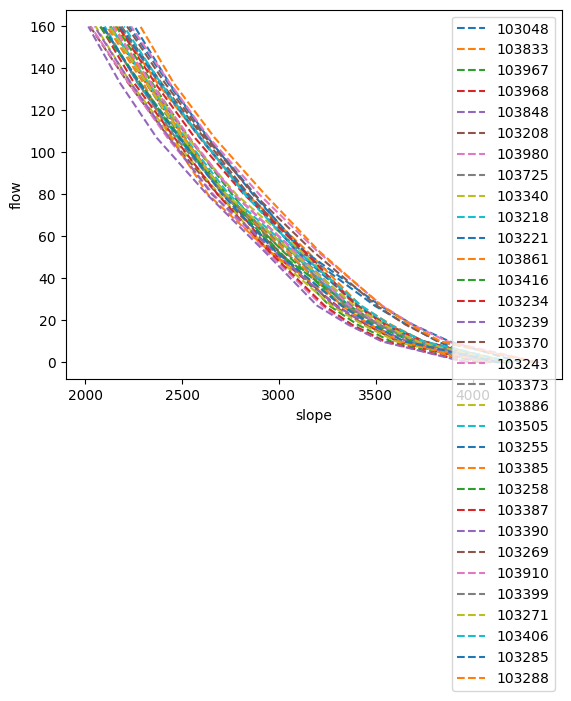

In [22]:
barcodes = [b for b in set(df['barcode'])]
for barcode in barcodes:
    df_sel = df[df.barcode == barcode]
    
    plt.plot(df_sel['slope'], df_sel['flow'], '--')
plt.xlabel('slope')
plt.ylabel('flow')
plt.legend(barcodes)

plt.show()

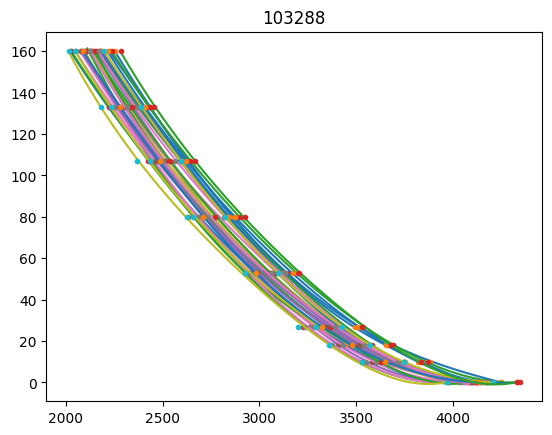

In [23]:
calib_params = dict()
for barcode in set(df['barcode']):
    df_sel = df[df.barcode == barcode]

    params = np.polynomial.polynomial.polyfit(df_sel['slope'], df_sel['flow'], 4)
    calib_params[barcode] = params
    xx = np.linspace(min(df_sel['slope']), max(df_sel['slope']), 100)
    yy = [np.dot(params, [1, x, x**2, x**3, x**4]) for x in xx]
    plt.plot(xx, yy)
    
    plt.plot(df_sel['slope'], df_sel['flow'], '.')
    plt.title(barcode)
    
    # plt.show()

In [24]:
import csv
with open('new_calib_constants.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow([
        'ID', 'CellID',
        'low_x0', 'low_x1', 'low_x2', 'low_x3', 'low_x4',
        'low_ZeroFlowSlope',
        'low_minFlow','low_maxFlow',
        'high_x0', 'high_x1', 'high_x2', 'high_x3', 'high_x4',
        'high_ZeroFlowSlope',
        'high_minFlow', 'high_maxFlow',
        'DateTimeStamp',
        'CalibrationGas'
    ])
    
    for k, v in calib_params.items():
        spamwriter.writerow([
            0, k,
            v[0], v[1], v[2], v[3], v[4],
            int(df[(df.barcode == k) & (df.flow==0)].iloc[0].slope),
            0, 160,
            0, 0, 0, 0, 0,
            -1,
            -1, -1,
            '08/02/2024 12:00:00',
            '93Ar7CO2'
        ])